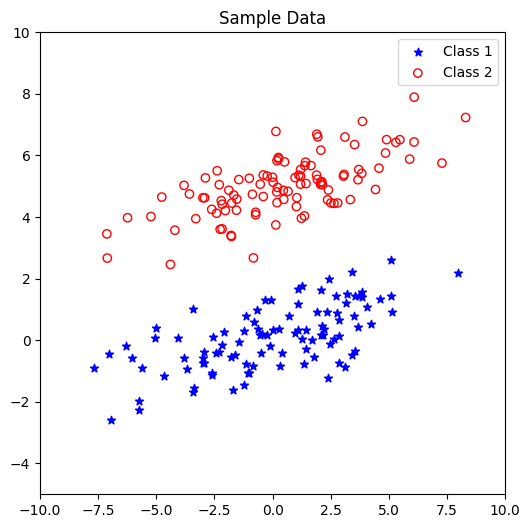

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# (Optional) 난수 생성의 재현성을 위해 시드(seed)를 설정
np.random.seed(0)

# 클래스 1, 클래스 2의 평균과 공분산 행렬 설정
mean1 = [0, 0]
mean2 = [0, 5]
cov = [[10, 2], [2, 1]]

# 클래스별로 100개씩 샘플 생성 (총 200개)
class1_samples = np.random.multivariate_normal(mean1, cov, 100)
class2_samples = np.random.multivariate_normal(mean2, cov, 100)

# 그림 그리기
plt.figure(figsize=(6, 6))

# 클래스 1 산점도 (파란색 별표)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1],
            color='blue', marker='*', label='Class 1')

# 클래스 2 산점도 (빨간색 동그라미, 내부 비우기)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1],
            facecolors='none', edgecolors='red', marker='o', label='Class 2')

# x축 범위 [-10, 10], y축 범위 [-5, 10]으로 설정
plt.xlim(-10, 10)
plt.ylim(-5, 10)

plt.title('Sample Data')
plt.legend(loc='upper right')

plt.show()

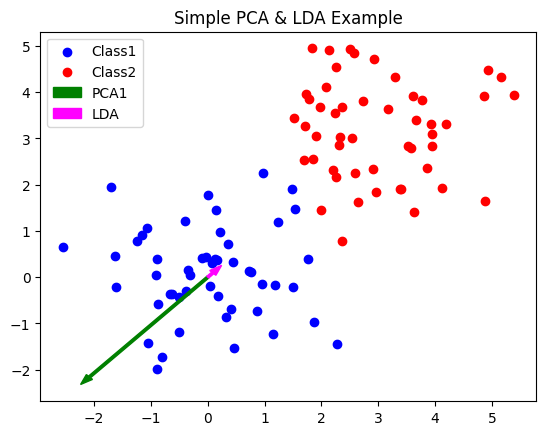

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# 간단히 두 개 클래스 데이터 생성 (50개씩)
class1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 50)
class2 = np.random.multivariate_normal([3,3], [[1,0],[0,1]], 50)

# 전체 데이터 (100 x 2)
data = np.vstack((class1, class2))

# ----- PCA 1st 주성분 구하기 -----
# 1) 평균 제거
mean_all = data.mean(axis=0)
data_center = data - mean_all
# 2) 공분산 행렬 & 고유분해
cov_mat = np.cov(data_center.T)
eigvals, eigvecs = np.linalg.eig(cov_mat)
# 3) 가장 큰 고유값에 해당하는 고유벡터 (주성분)
pca_vec = eigvecs[:, np.argmax(eigvals)]

# ----- LDA 벡터 구하기 (2-class) -----
m1 = class1.mean(axis=0)
m2 = class2.mean(axis=0)

# Within-class scatter (간단 버전)
S1 = ((class1 - m1).T).dot(class1 - m1)
S2 = ((class2 - m2).T).dot(class2 - m2)
Sw = S1 + S2

# LDA 방향
w_lda = np.linalg.inv(Sw).dot(m2 - m1)

# ----- 시각화 -----
plt.scatter(class1[:,0], class1[:,1], c='blue', label='Class1')
plt.scatter(class2[:,0], class2[:,1], c='red', label='Class2')

# 원점에서 벡터 표시 (대충 스케일해서 그림)
plt.arrow(0,0, pca_vec[0]*3, pca_vec[1]*3, 
          width=0.05, color='green', label='PCA1')
plt.arrow(0,0, w_lda[0]*3, w_lda[1]*3, 
          width=0.05, color='magenta', label='LDA')

plt.legend()
plt.title('Simple PCA & LDA Example')
plt.show()